<a href="https://colab.research.google.com/github/suryaadi45/Submision/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Surya Adi Purwanto
- **Email:** adisurya271@gmail.com
- **ID Dicoding:** surya4545

## Menentukan Pertanyaan Bisnis

- Dari daerah mana saja pembeli terbanyak?
- Produk apa yang paling banyak terjual?
- Penjual mana yang paling banyak menjual barangnya?
- Pembayaran terbanyak dengan menggunakan metode apa?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/suryaadi45/Submision/refs/heads/main/Data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
orders_items_df = pd.read_csv("https://raw.githubusercontent.com/suryaadi45/Submision/refs/heads/main/Data/order_items_dataset.csv")
orders_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/suryaadi45/Submision/refs/heads/main/Data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Pengambilan data dan menampilkan data sampling dari datasheet Costumers
- Pengambilan data dan menampilkan data sampling dari datasheet Order Items
- Pengambilan data dan menampilkan data sampling dari datasheet Order Payments

### Assessing Data

In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.isna().sum()


Jumlah duplikasi:  0


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [7]:
orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
orders_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [9]:
print("Jumlah duplikasi: ", orders_items_df.duplicated().sum())
orders_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [10]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [11]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [12]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Data costumers tidak ada keanehan
- Data orders_items terdapat nilai maksimal yang lebih tinggi dibanding lainnya di price
- Data orders_items terdapat kesalahan tipe data untuk shipping_limit_date
- Data orders_payments terdapat nilai maksimal yang lebih tinggi dibanding lainnya di payment value

### Cleaning Data

**Membersihkan Tabel Costumers**

In [20]:
customers_df[customers_df.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [21]:
customers_df.drop_duplicates(inplace=True)

In [22]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


**Membersihkan Tabel Orders Items**

In [23]:
orders_items_df[orders_items_df.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [24]:
orders_items_df.drop_duplicates(inplace=True)

In [25]:
print("Jumlah duplikasi: ", orders_items_df.duplicated().sum())

Jumlah duplikasi:  0


**Pengecekan Nilai Maksimum Tabel Orders Items**

In [13]:
orders_items_df[orders_items_df.price == orders_items_df.price.max()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31


In [14]:
orders_items_df.groupby(by="price").agg({
    "order_item_id": "nunique",
    "price": ["max", "min", "mean", "std"]
})

order_item_id    price                       
              nunique      max      min     mean  std
price                                                
0.85                2     0.85     0.85     0.85  0.0
1.20               20     1.20     1.20     1.20  0.0
2.20                1     2.20     2.20     2.20  NaN
2.29                1     2.29     2.29     2.29  NaN
2.90                1     2.90     2.90     2.90  NaN
...               ...      ...      ...      ...  ...
4690.00             1  4690.00  4690.00  4690.00  NaN
4799.00             1  4799.00  4799.00  4799.00  NaN
6499.00             1  6499.00  6499.00  6499.00  NaN
6729.00             1  6729.00  6729.00  6729.00  NaN
6735.00             1  6735.00  6735.00  6735.00  NaN

[5968 rows x 5 columns]

In [15]:
orders_items_df.groupby(by="freight_value").agg({
    "order_id": "nunique",
    "freight_value": ["max", "min", "mean", "std"]
})

order_id freight_value                     
               nunique           max     min    mean  std
freight_value                                            
0.00               339          0.00    0.00    0.00  0.0
0.01                 4          0.01    0.01    0.01  0.0
0.02                 3          0.02    0.02    0.02  0.0
0.03                 8          0.03    0.03    0.03  0.0
0.04                 4          0.04    0.04    0.04  0.0
...                ...           ...     ...     ...  ...
322.10               1        322.10  322.10  322.10  NaN
338.30               1        338.30  338.30  338.30  NaN
339.59               1        339.59  339.59  339.59  NaN
375.28               2        375.28  375.28  375.28  0.0
409.68               1        409.68  409.68  409.68  NaN

[6999 rows x 5 columns]

**Memperbaiki Tipe Data orders_items**

In [17]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  orders_items_df[column] = pd.to_datetime(orders_items_df[column])

In [18]:
orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [19]:
orders_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Membersihkan Tabel Orders Payments**

In [26]:
order_payments_df[order_payments_df.duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [27]:
order_payments_df.drop_duplicates(inplace=True)

In [28]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


**Pengecekan Nilai Maksimum Tabel Orders Payments**

In [16]:
order_payments_df[order_payments_df.payment_value == order_payments_df.payment_value.max()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08


In [29]:
order_payments_df.groupby(by="payment_value").agg({
    "order_id": "nunique",
    "payment_value": ["max", "min", "mean", "std"]
})

order_id payment_value                         
               nunique           max       min      mean  std
payment_value                                                
0.00                 8          0.00      0.00      0.00  0.0
0.01                 6          0.01      0.01      0.01  0.0
0.03                 2          0.03      0.03      0.03  0.0
0.05                 2          0.05      0.05      0.05  0.0
0.07                 1          0.07      0.07      0.07  NaN
...                ...           ...       ...       ...  ...
6726.66              1       6726.66   6726.66   6726.66  NaN
6922.21              1       6922.21   6922.21   6922.21  NaN
6929.31              1       6929.31   6929.31   6929.31  NaN
7274.88              1       7274.88   7274.88   7274.88  NaN
13664.08             1      13664.08  13664.08  13664.08  NaN

[29077 rows x 5 columns]

**Insight:**
- Data Tabel Costumers telah dibersih dan tidak ada file duplikat
- Data Tabel Orders Items telah dibersihkan agar tidak ada file duplikat, serta dilakukan pengecekan terhadap parameter nilai maksimal dan penggantian tipe data untuk tanggal
- Data Tabel Orders Payments telah dibersihkan agar tidak ada file duplikat, serta dilakukan pengecekan terhadap parameter nilai maksimal

## Exploratory Data Analysis (EDA)

### Explore ...

In [34]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [36]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
14143,c92ab9f6558a4e8916df8332a6ae38a8,7f4c1190dffe5dc69870ec021c95b42f,22020,rio de janeiro,RJ
35404,ce6ccd40c94d231ac012f6488f144380,f7d6e0dd60c793a6616c4736cfc8ff16,8215,sao paulo,SP
51070,59c09662f63b5e4e8696f236b7067c94,f0395f0f938bfad8ad9299d5fd4c5f6f,35680,itauna,MG
71971,ae98ca07977906a78cfedffd0b3b90da,9063fb891289bc5ce36d6f60fb54a3c9,18385,itapirapua paulista,SP
48134,d1b06f3759195097bcee2e0eac97859c,9d84f7829432501761b1b1d43356bb7a,81240,curitiba,PR


In [37]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [38]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [39]:
orders_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [40]:
orders_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57180,82262a82713a250e0e1f99b5111b9614,1,a0736b92e52f6cead290e30b578413b6,391fc6631aebcf3004804e51b40bcf1e,2018-08-08 18:45:16,49.70,34.66
60209,8937c3e485f73f480931feaca88a35cb,1,c347971e06135135a97fd33d9db5b74c,9a208dee8f95cfdf00760c4d627828ec,2017-02-22 18:56:08,269.90,26.09
68799,9d302458a5c2070516051da353068870,1,2ff995aead9c63a1f37a07b3664ead37,8b9d6eec4a7eb7d0f9d579ce0b38324d,2018-08-24 11:31:10,74.99,10.53
4232,0988e6e21a5bd6dee0c95d3a85970d98,1,2480cf865df7d91234cf0ea77e8bd68c,7299e27ed73d2ad986de7f7c77d919fa,2018-06-20 22:16:03,210.00,24.62
26503,3c4e225b9b32cc19fcefee42082df53f,1,cfc665b462ccc3a43b1a1283e678b1a0,5c6d4016c2a288f074fa0848a2b653d2,2017-11-03 13:07:18,59.00,16.04


In [41]:
orders_items_df.groupby(by="product_id").order_item_id.nunique().sort_values(ascending=False)

,order_item_id
product_id,
9571759451b1d780ee7c15012ea109d4,20
ee3d532c8a438679776d222e997606b3,20
89b190a046022486c635022524a974a8,15
37eb69aca8718e843d897aa7b82f462d,15
422879e10f46682990de24d770e7f83d,14
...,...
5c9f86c0e642b62c2100fd8d26f38771,1
5c9ef6c35fdbad9275157b1929c37fb0,1
5c9d92777b62444d9fbffe92338d9e21,1


In [42]:
orders_items_df.groupby(by="seller_id").order_item_id.nunique().sort_values(ascending=False)

,order_item_id
seller_id,
2709af9587499e95e803a6498a5a56e9,21
8e6d7754bc7e0f22c96d255ebda59eba,20
ce27a3cc3c8cc1ea79d11e561e9bebb6,20
0b36063d5818f81ccb94b54adfaebbf5,15
f326006815956455b2859abd58fe7e39,15
...,...
702835e4b785b67a084280efca355756,1
70126eecc6aa1274392a1743866e9678,1
700f03c207639c22d933381ff60b35c2,1


In [43]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [44]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
87559,0a03ed20390f0245ab850bea4186190d,1,credit_card,1,186.82
17556,d301cecfb230ab6585d1afcc0d63a417,1,credit_card,1,22.38
38353,1a076ebf5225e2c21de6fad7c324ddec,1,boleto,1,227.24
1029,7e54f2e2af1f04c407423998a9812c73,1,credit_card,1,92.80
80091,696a70ec4283b80f3e55c6181754d2a3,1,boleto,1,86.44


In [45]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


**Menggabungkan Data orders_items_df dengan order_payments_df**

In [46]:
some_df = pd.merge(
    left=orders_items_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
some_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


**Explore Data Data orders_items_df dengan order_payments_df**

In [47]:
some_df.groupby(by=["seller_id", "product_id"]).agg({
    "order_item_id": "sum",
    "price": "sum"
})

order_item_id  \
seller_id                        product_id                                        
0015a82c2db000af6aaaf3ae2ecb0532 a2ff5a97bf95719e38ea2e3b4105bce8              3   
001cca7ae9ae17fb1caed9dfb1094831 08574b074924071f4e201e151b152b4e            133   
                                 0da9ffd92214425d880de3f94e74ce39             18   
                                 21fecd254a3103704126b28478ea7980              3   
                                 4d7fee7877228c1497477ae53d97c214              2   
...                                                                          ...   
ffff564a4f9085cd26170f4732393726 cb17b798ba889575385281b7ec2fc22b              1   
                                 dbd024d4182504993ad1e3cd2ee9d9e9              2   
                                 de6517dda8e49774f58c07f80abc8d7a              1   
                                 e20b58fe57d487f33247e6cc1154eb9c              1   
                                 fa2de9e6a52f697fbd74ddbc2c15b16c              1   

                                                                      price  
seller_id                        product_id                                  
0015a82c2db000af6aaaf3ae2ecb0532 a2ff5a97bf95719e38ea2e3b4105bce8   2685.00  
001cca7ae9ae17fb1caed9dfb1094831 08574b074924071f4e201e151b152b4e  10928.20  
                                 0da9ffd92214425d880de3f94e74ce39   1819.93  
                                 21fecd254a3103704126b28478ea7980    337.00  
                                 4d7fee7877228c1497477ae53d97c214    178.00  
...                                                                     ...  
ffff564a4f9085cd26170f4732393726 cb17b798ba889575385281b7ec2fc22b    109.20  
                                 dbd024d4182504993ad1e3cd2ee9d9e9     58.80  
                                 de6517dda8e49774f58c07f80abc8d7a     69.00  
                                 e20b58fe57d487f33247e6cc1154eb9c    103.95  
                                 fa2de9e6a52f697fbd74ddbc2c15b16c    114.50  

[34448 rows x 2 columns]

In [48]:
some_df.groupby(by=["payment_type", "order_id"]).agg({
        "payment_installments": "sum",
        "payment_value": "sum"
})

payment_installments  \
payment_type order_id                                                 
boleto       00048cc3ae777c65dbb7d2a0634bc1ea                   1.0   
             0008288aa423d2a3f00fcb17cd7d8719                   2.0   
             0009792311464db532ff765bf7b182ae                   1.0   
             000c3e6612759851cc3cbb4b83257986                   1.0   
             00130c0eee84a3d909e75bc08c5c3ca1                   1.0   
...                                                             ...   
voucher      ff20ee702706d9e407a34de9fe2ff768                   1.0   
             ff7400d904161b62b6e830b3988f5cbd                   1.0   
             ff978de32e717acd3b5abe1fb069d2b6                   4.0   
             ffa1dd97810de91a03abd7bd76d2fed1                   1.0   
             ffa39020fe7c8a3e907320e1bec4b985                   1.0   

                                               payment_value  
payment_type order_id                                         
boleto       00048cc3ae777c65dbb7d2a0634bc1ea          34.59  
             0008288aa423d2a3f00fcb17cd7d8719         253.08  
             0009792311464db532ff765bf7b182ae         127.55  
             000c3e6612759851cc3cbb4b83257986         112.71  
             00130c0eee84a3d909e75bc08c5c3ca1          35.84  
...                                                      ...  
voucher      ff20ee702706d9e407a34de9fe2ff768          50.00  
             ff7400d904161b62b6e830b3988f5cbd         100.00  
             ff978de32e717acd3b5abe1fb069d2b6          49.14  
             ffa1dd97810de91a03abd7bd76d2fed1         418.73  
             ffa39020fe7c8a3e907320e1bec4b985          64.01  

[100892 rows x 2 columns]

In [49]:
some_df.groupby(by=["payment_type"]).agg({
        "price": "sum",
        "payment_value": "sum"
})

,price,payment_value
payment_type,,
boleto,2391525.66,4059699.60
credit_card,10974357.30,15589028.22
debit_card,183758.74,253533.86
voucher,659473.64,405873.03


In [50]:
some_df.groupby(by="shipping_limit_date").order_id.nunique().sort_values(ascending=False)

,order_id
shipping_limit_date,
2017-12-07 04:39:05,6
2018-06-11 03:31:04,6
2018-05-21 03:55:59,5
2018-03-19 04:31:10,5
2018-01-30 02:35:42,5
...,...
2017-11-08 16:10:46,1
2017-11-08 16:10:37,1
2017-11-08 16:10:20,1


In [ ]:
some_df.to_csv("some_data.csv", index=False)

**Insight:**
- Mendapatkan 5 costumer state dan costumer city terbanyak
- Mendapatkan produk yang terlaris dan penjual yang paling banyak pembeli
- Mendapatkan metode pembayaran terbanyak

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-35-c0a99029139d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette=colors)


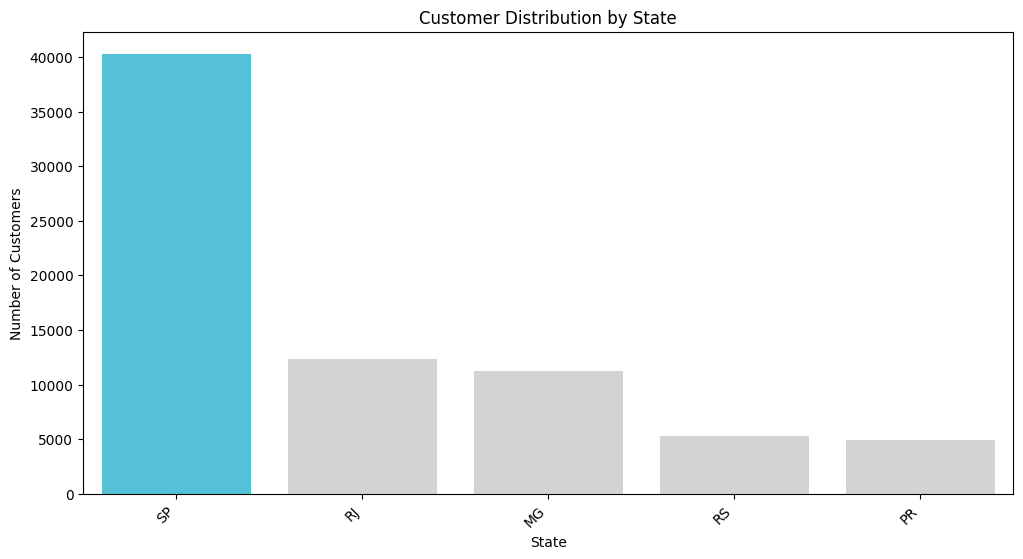

In [ ]:
state_counts = customers_df.groupby('customer_state')['customer_unique_id'].nunique().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
colors = ["#3ED0ED", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x=state_counts.index, y=state_counts.values, palette=colors)
plt.title('Customer Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
_ = plt.xticks(rotation=45, ha='right')

<ipython-input-36-17aa30165ea4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette=colors)


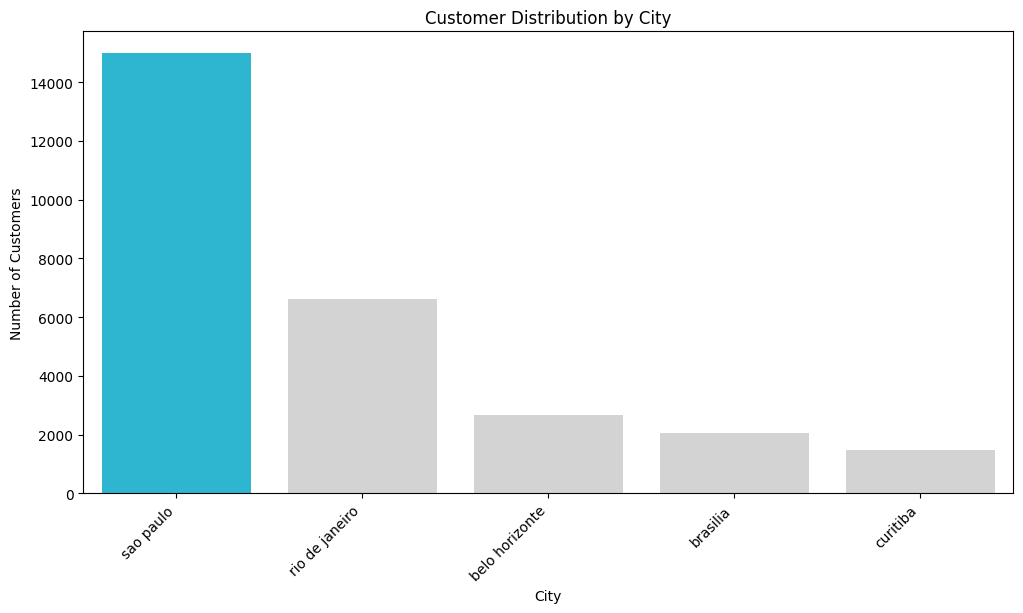

In [ ]:
state_counts = customers_df.groupby('customer_city')['customer_unique_id'].nunique().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
colors = ["#13C7EB", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x=state_counts.index, y=state_counts.values, palette=colors)
plt.title('Customer Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
_ = plt.xticks(rotation=45, ha='right')

### Pertanyaan 2:

<ipython-input-37-7367c54e24eb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette=colors)


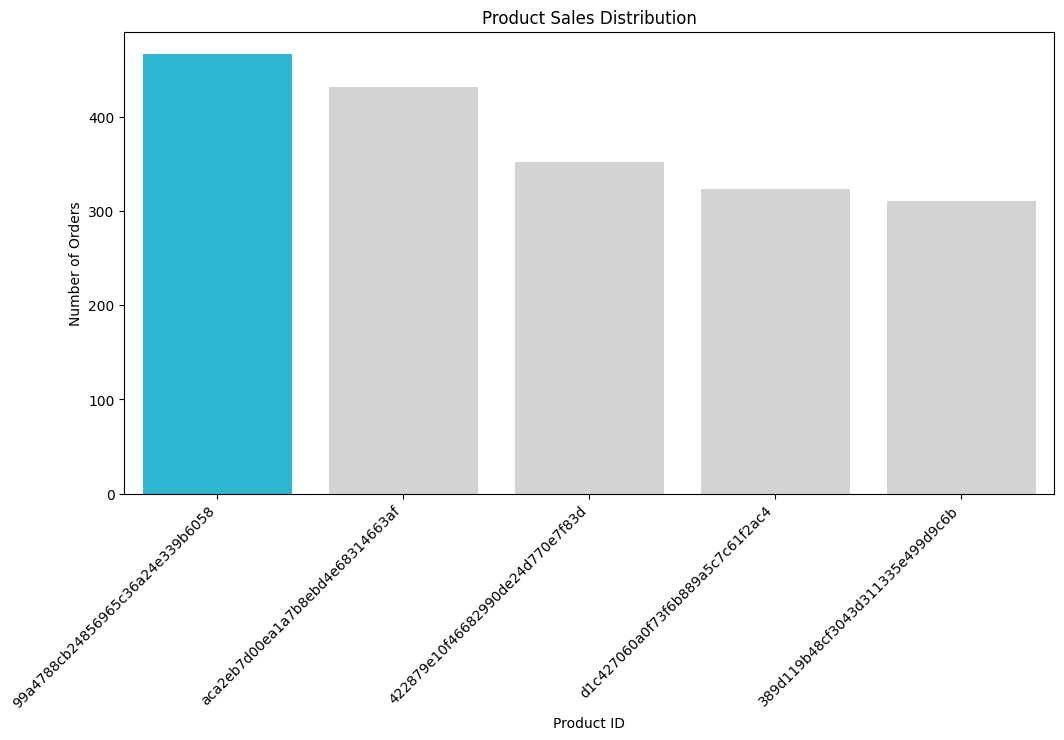

In [ ]:
state_counts = orders_items_df.groupby('product_id')['order_id'].nunique().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
colors = ["#13C7EB", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x=state_counts.index, y=state_counts.values, palette=colors)
plt.title('Product Sales Distribution')
plt.xlabel('Product ID')
plt.ylabel('Number of Orders')
_ = plt.xticks(rotation=45, ha='right')

### Pertanyaan 3:

<ipython-input-38-1294f8dedb12>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette=colors)


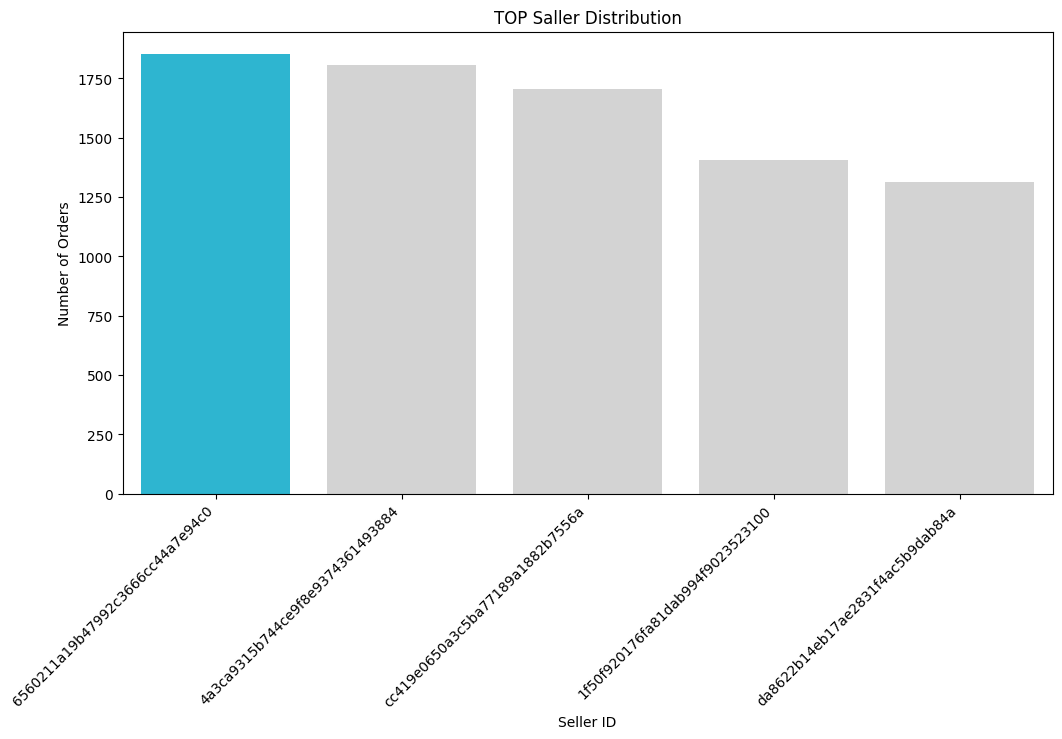

In [ ]:
state_counts = orders_items_df.groupby('seller_id')['order_id'].nunique().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
colors = ["#13C7EB", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x=state_counts.index, y=state_counts.values, palette=colors)
plt.title('TOP Saller Distribution')
plt.xlabel('Seller ID')
plt.ylabel('Number of Orders')
_ = plt.xticks(rotation=45, ha='right')

### Pertanyaan 4:

<ipython-input-39-7a7fcea15701>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette=colors)


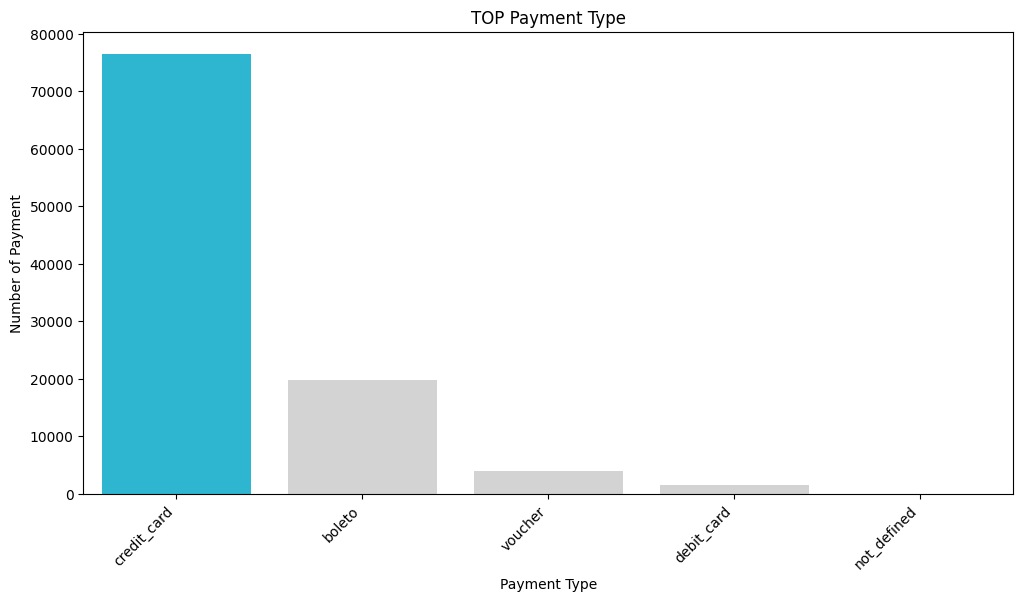

In [ ]:
state_counts = order_payments_df.groupby('payment_type')['order_id'].nunique().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
colors = ["#13C7EB", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x=state_counts.index, y=state_counts.values, palette=colors)
plt.title('TOP Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Payment')
_ = plt.xticks(rotation=45, ha='right')

**Insight:**
- Menampilkan 5 daerah dengan pembeli terbanyak
- Menampilkan 5 produk dengan pembelian terbanyak
- Menampilkan 5 ID penjual barang terbanyak
- Menampilkan 5 metode pembayaran


## Conclusion

- Costumer terbanyak berasal dari daerah SP yang paling banyak dari daerah Sao Paulo
- Produk ID 9571759451b1d780ee7c15012ea109d4 memiliki penjualan terbanyak
- Penjual dengan ID 2709af9587499e95e803a6498a5a56e9 memiliki penjualan terbanyak
- Metode yang digunakan terbanyak dalam pembayaran menggunakan Credit Card